### Data Preprocessing

##### importing the required libraries and loading in the dataset

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df = pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

There are a bunch of data that is an int64 that should be categorical which we take care of in a code block below

In [261]:
df.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

Ease-ment has only one unique value indicating that it has no valuable data. 

In [262]:
# converting Sale Date to a pandas datetime 
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

# removing irrelevant variables
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# changing the data types to better suit what is categoies and what isn't
categorical = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY',
               'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
               'ZIP CODE','YEAR BUILT','TAX CLASS AT TIME OF SALE',
               'BUILDING CLASS AT TIME OF SALE']
numerical = ['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']

for col in categorical:
    df[col] = df[col].astype('category')

for col in numerical: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

After changing the values to the proper data types Land Square Feet, Gross Square Feet, and Sale Price have some null values

In [264]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE DATE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,6.998700e+04,84548
mean,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1.276456e+06,2017-02-26 10:03:23.018403584
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2016-09-01 00:00:00
25%,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,2.250000e+05,2016-11-29 00:00:00
50%,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,5.300000e+05,2017-02-28 00:00:00
75%,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,9.500000e+05,2017-05-26 00:00:00
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09,2017-08-31 00:00:00
std,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,1.140526e+07,NaN


Based on the high std for each column there is a lot of variability in the data set. Which could make it difficult to do predictions.

In [265]:
# calculating percent of Null values
round(df.isnull().sum()/len(df)*100,2)

BOROUGH                            0.00
NEIGHBORHOOD                       0.00
BUILDING CLASS CATEGORY            0.00
TAX CLASS AT PRESENT               0.00
BLOCK                              0.00
LOT                                0.00
EASE-MENT                          0.00
BUILDING CLASS AT PRESENT          0.00
ADDRESS                            0.00
APARTMENT NUMBER                   0.00
ZIP CODE                           0.00
RESIDENTIAL UNITS                  0.00
COMMERCIAL UNITS                   0.00
TOTAL UNITS                        0.00
LAND SQUARE FEET                  31.05
GROSS SQUARE FEET                 32.66
YEAR BUILT                         0.00
TAX CLASS AT TIME OF SALE          0.00
BUILDING CLASS AT TIME OF SALE     0.00
SALE PRICE                        17.22
SALE DATE                          0.00
sale_year                          0.00
sale_month                         0.00
dtype: float64

Land square feet, gross square feet, and sale price have a high amount of null values and we need to determine weather to drop them or impute the data. 

In [266]:
# replacing blank values with Null
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
sale_year                           0.000000
sale_month

After replacing blanks with NA values Ease-ment and apartment number have almost no data so we should drop them. Additionally Land square feet, gross square feet, sale price, and tax class at present have null values so we should look at them. Because Land squre feet and gross square feet are missing more than 30% of data I will drop them and I will impute Sale price with its median value. The Tax Class at present has a few NA values which I will just drop those rows. 

In [267]:
# dropping high na columns
df.drop(columns=['EASE-MENT','APARTMENT NUMBER','LAND SQUARE FEET','GROSS SQUARE FEET'], inplace = True)

In [268]:
# imputing sales price with the median value
df['SALE PRICE'].fillna(df['SALE PRICE'].median(), inplace=True)

In [269]:
# dropping na values
df.dropna(inplace=True)

we need to check if there are any duplicate values and drop them. 

In [270]:
sum(df.duplicated())

767

there are 767 duplicated values that we will drop

In [271]:
# dropping duplicates
df.drop_duplicates(inplace=True)

I'm saving the file as a csv file to use in future analysis

In [272]:
df.to_csv("nyc-rolling-sales-clean")

#### Data Visualization

In [273]:
df[(df['SALE PRICE']<10000) | (df['SALE PRICE']>10000000)]['SALE PRICE'].count() /len(df)

0.14603277819924618

14% of the sale prices falls below $10,000 and above $10,000,000 which we must drop from the data. 

In [274]:
df2= df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df2['SALE PRICE'].describe()

count    7.083600e+04
mean     8.932150e+05
std      1.086791e+06
min      1.000100e+04
25%      4.400000e+05
50%      5.300000e+05
75%      8.990000e+05
max      9.999999e+06
Name: SALE PRICE, dtype: float64

There is a large difference between the max sales price and min sales price. The average is substantially higher than the median which indicates skewness in the data. 

/var/folders/5w/356s29k50cnbw192t445fkjm0000gn/T/ipykernel_75424/2856404790.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)


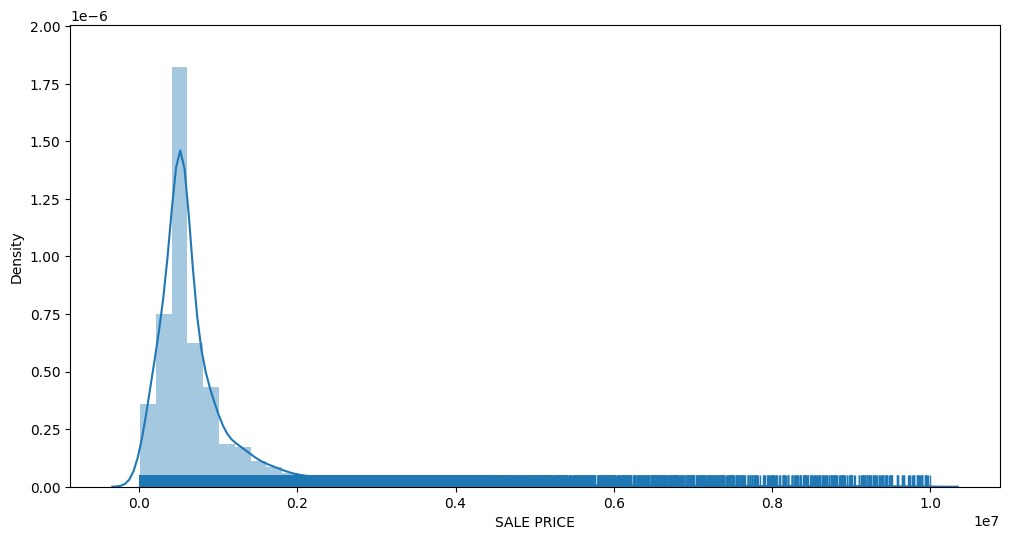

In [275]:
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

Due to the vast majority of sales price's being low $4,000,000 will drop them and re-evaluate the plot.

/var/folders/5w/356s29k50cnbw192t445fkjm0000gn/T/ipykernel_75424/2239329837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)


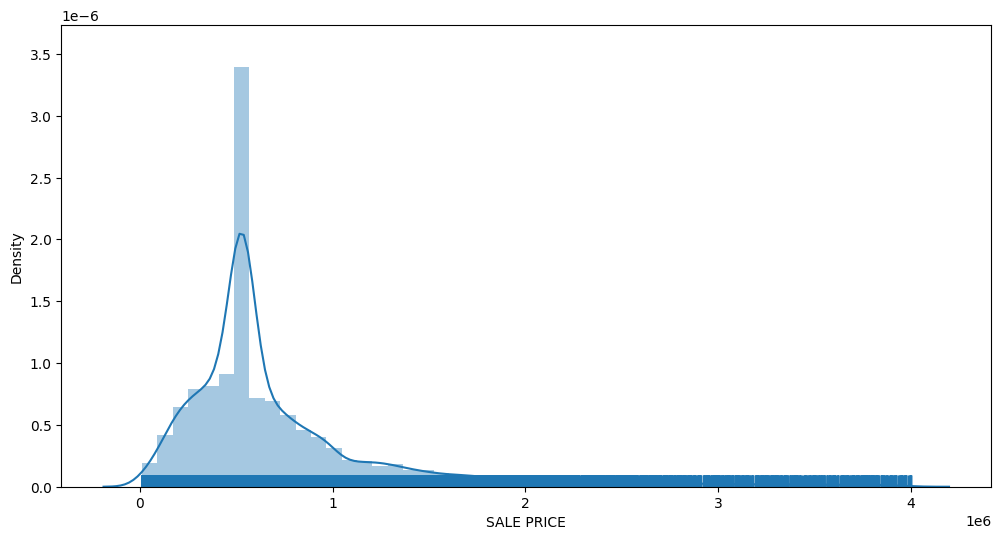

In [276]:
df2= df2[(df2['SALE PRICE']<4000000)]
plt.figure(figsize=(12,6))
sns.distplot(df2['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

The above histogram is right skewed indicating that the median sales price is below the average. 

/var/folders/5w/356s29k50cnbw192t445fkjm0000gn/T/ipykernel_75424/2494260248.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)


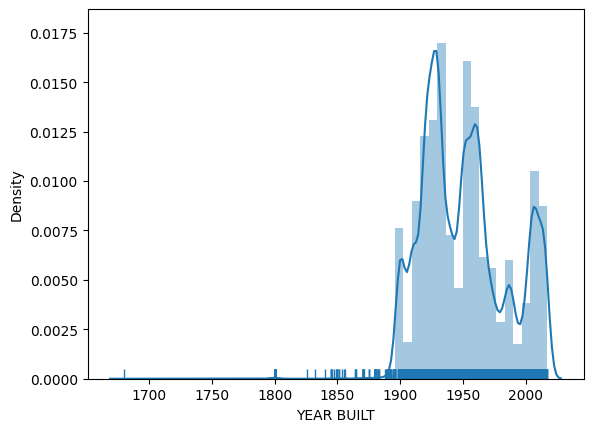

In [245]:
# lets take a look a the year built
df3=df2[df2['YEAR BUILT']!=0].copy()
sns.distplot(df3['YEAR BUILT'], bins=50, rug=True)
plt.show()

This histogram on year built shows the majority of sales happened between 1900 and 2000. The biggest years happened around 1925. After doing more research around those years it was clear that a bubble was surrounding those years that was being inflated by the new use of credit/lending. 

In [246]:
# lets take a look at total units
df3[df3['TOTAL UNITS']==0]['TOTAL UNITS'].count()

16060

/var/folders/5w/356s29k50cnbw192t445fkjm0000gn/T/ipykernel_75424/4267447796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)


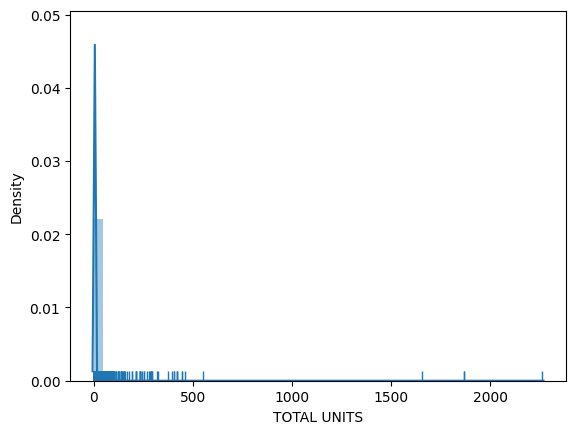

In [247]:
df4=df3[df3['TOTAL UNITS']!=0].copy()
sns.distplot(df4['TOTAL UNITS'], bins=50, rug=True)
plt.show()

#### Finalizing data

Dropping a few unnessary columns.

In [248]:
df4.drop(['BLOCK','LOT','ADDRESS'], axis=1, inplace=True)

In [249]:
# we will make the borough names more readable. 

#'1':'Manhattan', '2':'Bronx', '3': 'Brooklyn', '4':'Queens','5':'Staten Island'
df4['BOROUGH']= df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df4.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,10009,28,3,31,1900,2,C7,530000.0,2016-12-14,2016,12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,10009,16,1,17,1900,2,C7,530000.0,2016-12-09,2016,12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,1913,2,C4,3936272.0,2016-09-23,2016,9
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C4,10009,20,0,20,1900,2,C4,530000.0,2017-07-20,2017,7
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1920,2,C4,3192840.0,2016-09-23,2016,9


In [250]:
# sales price by borough
df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
df_bar

/var/folders/5w/356s29k50cnbw192t445fkjm0000gn/T/ipykernel_75424/1377360210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bar =df4[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()


,BOROUGH,SALE PRICE
0,Staten Island,5.127855e+05
1,Bronx,5.581147e+05
2,Queens,6.463164e+05
3,Brooklyn,1.039752e+06
4,Manhattan,1.210823e+06


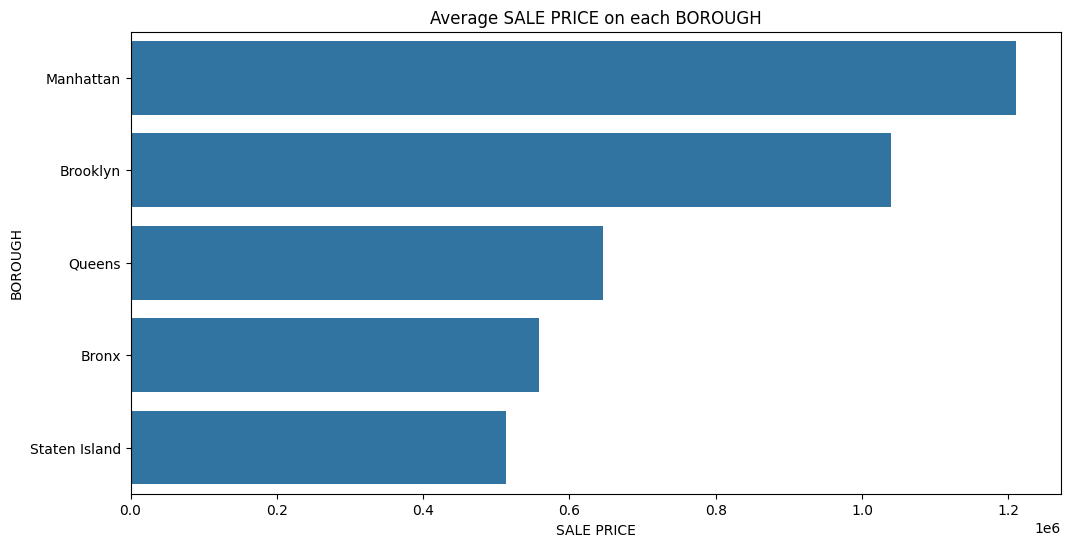

In [251]:
# bar graph
plt.figure(figsize=(12,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_bar, order = df_bar.sort_values('SALE PRICE', ascending=False)['BOROUGH'])
plt.title('Average SALE PRICE on each BOROUGH')
plt.show()

Based on the above graph we can see that Manhattan has the highest average Sale Price. 

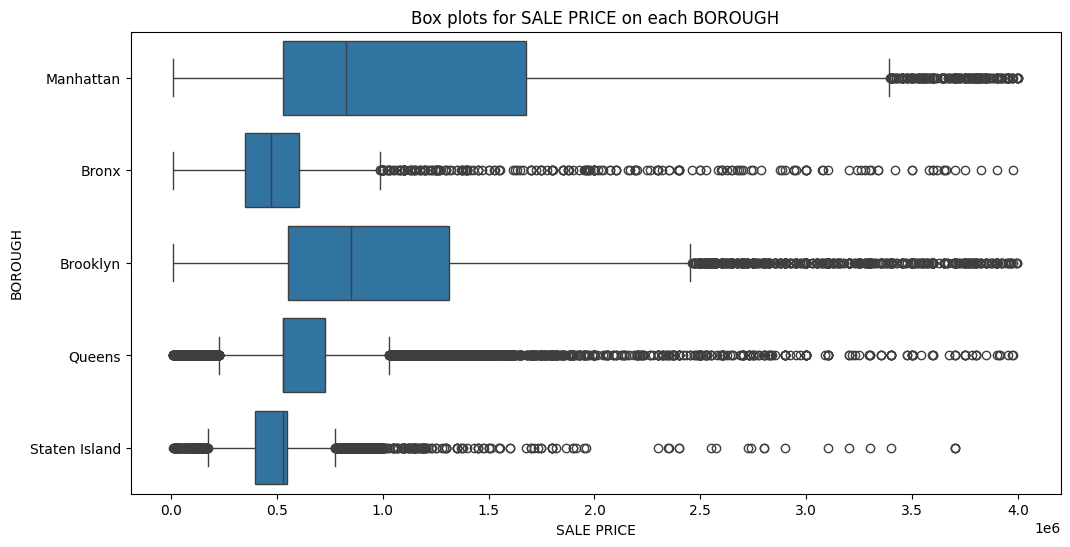

In [252]:
# boxplot
plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = df4 )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

Manhatten has the largest interquartile range with the smallest amount of outliers. Queens has the smallest interquartile function but the largest number of outliers. 

In [253]:
df_bar=df4[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

/var/folders/5w/356s29k50cnbw192t445fkjm0000gn/T/ipykernel_75424/476104650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bar=df4[['sale_month', 'SALE PRICE']].groupby(by='sale_month').count().sort_values(by='sale_month', ascending=True).reset_index()


,sale_month,Sales_count
0,1,3916
1,2,3677
2,3,4515
3,4,3777
4,5,4242
5,6,4571
6,7,3545
7,8,3017
8,9,4435
9,10,3793


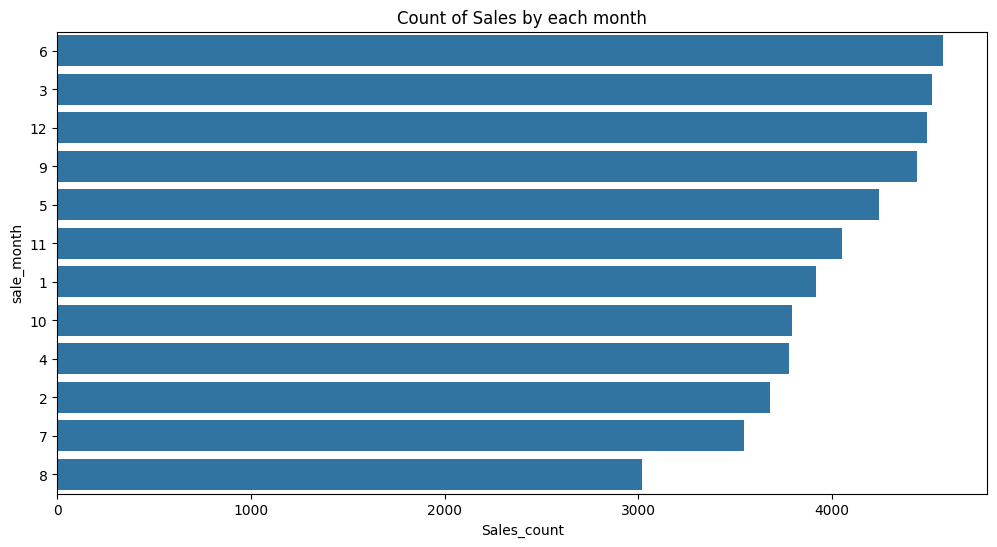

In [254]:
plt.figure(figsize=(12, 6))
sns.barplot(y='sale_month', x='Sales_count', data=df_bar, order=df_bar.sort_values('Sales_count', ascending=False)['sale_month'])
plt.title('Count of Sales by each month')
plt.show()

According the graph above the most sales happen in the month of June and the lowest is August. This is fascinating since they are a month apart and in the same season. I wonder if August is the lowest due to the fact of school starting. 